In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV File Upload

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# all_data_csv = glob.glob("data/*.csv")
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"emilguzman","key":"c18df66dc739ffe362255a0762353e69"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mexwell/nba-shots

Dataset URL: https://www.kaggle.com/datasets/mexwell/nba-shots
License(s): other
 88% 71.0M/80.4M [00:00<00:00, 92.3MB/s]
100% 80.4M/80.4M [00:00<00:00, 88.2MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

In [15]:
# Consolidating all csv files
import os
file_names = os.listdir()
all_data_csv = [file for file in file_names if file.endswith('.csv')]

In [16]:
dfs_combine = []

# for each file, add to dfs_combine
for file in all_data_csv:
    df = pd.read_csv(file)
    dfs_combine.append(df)

# join dfs together
df_all_data = pd.concat(dfs_combine, ignore_index=True)

# save combined dfs into new file
df_all_data.to_csv('all_years.csv', index=False)

In [17]:
# removes the individual year csv files from directory
for file in all_data_csv:
  os.remove(file)


# Exploration

In [19]:
data = pd.read_csv('all_years.csv')

In [20]:
print('Data Columns: ')
print(data.columns)
print('Data Shape: ')
print(data.shape)

Data Columns: 
Index(['SEASON_1', 'SEASON_2', 'TEAM_ID', 'TEAM_NAME', 'PLAYER_ID',
       'PLAYER_NAME', 'POSITION_GROUP', 'POSITION', 'GAME_DATE', 'GAME_ID',
       'HOME_TEAM', 'AWAY_TEAM', 'EVENT_TYPE', 'SHOT_MADE', 'ACTION_TYPE',
       'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB', 'ZONE_RANGE',
       'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT'],
      dtype='object')
Data Shape: 
(4231262, 26)


In [21]:
data.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2006,2005-06,1610612743,Denver Nuggets,2035,DerMarr Johnson,G,SG,04-19-2006,20501230,...,Above the Break 3,Right Side Center,RC,24+ ft.,-15.6,36.15,34,4,0,1
1,2006,2005-06,1610612760,Seattle SuperSonics,101230,Noel Felix,F,SF,04-19-2006,20501230,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,5.25,0,4,0,1
2,2006,2005-06,1610612743,Denver Nuggets,1922,Francisco Elson,C,C,04-19-2006,20501230,...,Above the Break 3,Right Side Center,RC,24+ ft.,-18.9,25.45,27,4,0,8
3,2006,2005-06,1610612743,Denver Nuggets,101132,Linas Kleiza,F,PF,04-19-2006,20501230,...,Mid-Range,Left Side,L,16-24 ft.,17.4,4.95,17,4,0,16
4,2006,2005-06,1610612743,Denver Nuggets,2035,DerMarr Johnson,G,SG,04-19-2006,20501230,...,Above the Break 3,Left Side Center,LC,24+ ft.,12.6,27.45,25,4,0,29


In [22]:
for attribute in data.columns:
    print('-----' + attribute + '-----')
    print(data[attribute].unique())
    print('\n')

-----SEASON_1-----
[2006 2014 2008 2017 2022 2020 2013 2023 2004 2007 2016 2012 2005 2009
 2024 2015 2011 2018 2010 2021 2019]


-----SEASON_2-----
['2005-06' '2013-14' '2007-08' '2016-17' '2021-22' '2019-20' '2012-13'
 '2022-23' '2003-04' '2006-07' '2015-16' '2011-12' '2004-05' '2008-09'
 '2023-24' '2014-15' '2010-11' '2017-18' '2009-10' '2020-21' '2018-19']


-----TEAM_ID-----
[1610612743 1610612760 1610612761 1610612741 1610612737 1610612745
 1610612750 1610612739 1610612763 1610612744 1610612738 1610612748
 1610612753 1610612759 1610612757 1610612754 1610612756 1610612762
 1610612765 1610612747 1610612764 1610612740 1610612755 1610612766
 1610612742 1610612746 1610612751 1610612752 1610612749 1610612758]


-----TEAM_NAME-----
['Denver Nuggets' 'Seattle SuperSonics' 'Toronto Raptors' 'Chicago Bulls'
 'Atlanta Hawks' 'Houston Rockets' 'Minnesota Timberwolves'
 'Cleveland Cavaliers' 'Memphis Grizzlies' 'Golden State Warriors'
 'Boston Celtics' 'Miami Heat' 'Orlando Magic' 'San Antonio

In [23]:
# ['SEASON_1', 'SEASON_2', 'TEAM_ID', 'TEAM_NAME', 'PLAYER_ID',
#  'PLAYER_NAME', 'POSITION_GROUP', 'POSITION', 'GAME_DATE', 'GAME_ID',
#  'HOME_TEAM', 'AWAY_TEAM', 'EVENT_TYPE', 'SHOT_MADE', 'ACTION_TYPE',
#  'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB', 'ZONE_RANGE',
#  'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT']

# data already clean -> separate into attribute categories

pred_attrib = ['EVENT_TYPE', 'SHOT_MADE']
numerical_attrib = ['SEASON_1', 'TEAM_ID', 'PLAYER_ID', 'GAME_ID', 'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT']
categorical_attrib = list(set(data.columns) - set(pred_attrib) - set(numerical_attrib))

<Axes: >

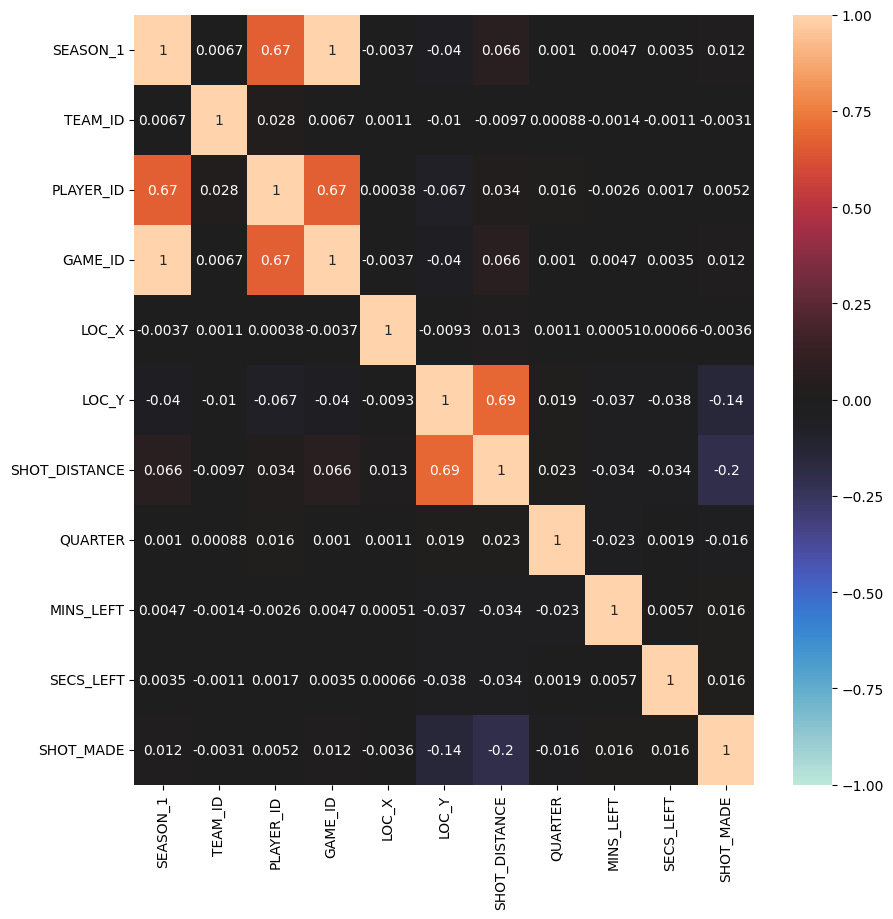

In [24]:
# heatmap w/ numerical attributes

# make figure larger
fig, ax = plt.subplots(figsize=(10,10))

heat_vars = numerical_attrib.copy()
heat_vars.append('SHOT_MADE')
sns.heatmap(data[heat_vars].corr(), annot=True,vmin=-1, vmax=1, center= 0, ax=ax)

In [25]:
# pairplot with sample of data
sample = data.sample(int(len(data) * 0.0005))
sns.pairplot(sample, hue='SEASON_1', diag_kind='auto')

Output hidden; open in https://colab.research.google.com to view.

# Pre-Processing

In [27]:
print(data.columns)

Index(['SEASON_1', 'SEASON_2', 'TEAM_ID', 'TEAM_NAME', 'PLAYER_ID',
       'PLAYER_NAME', 'POSITION_GROUP', 'POSITION', 'GAME_DATE', 'GAME_ID',
       'HOME_TEAM', 'AWAY_TEAM', 'EVENT_TYPE', 'SHOT_MADE', 'ACTION_TYPE',
       'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB', 'ZONE_RANGE',
       'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT'],
      dtype='object')


In [48]:
# Dropping redundant attributes
Preprocessed_Data = data.drop('SEASON_2', axis=1)
Preprocessed_Data = Preprocessed_Data.drop('TEAM_NAME', axis=1)
Preprocessed_Data = Preprocessed_Data.drop('PLAYER_NAME', axis=1)
Preprocessed_Data = Preprocessed_Data.drop('POSITION', axis=1)
Preprocessed_Data = Preprocessed_Data.drop('GAME_DATE', axis=1)
Preprocessed_Data = Preprocessed_Data.drop('EVENT_TYPE', axis=1)
Preprocessed_Data = Preprocessed_Data.drop('ZONE_NAME', axis=1)

In [49]:
# Encoding Categorical data

attributes_to_encode = ['POSITION_GROUP', 'HOME_TEAM', 'AWAY_TEAM', 'ACTION_TYPE', 'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_ABB', 'ZONE_RANGE']

for attribute in attributes_to_encode:
  encoding = 0
  observations = Preprocessed_Data[attribute].unique()
  for observation in observations:
    if pd.isna(observation): # Checks for NAN
      Preprocessed_Data.loc[Preprocessed_Data[attribute].isna(), attribute] = -1
    else:
      Preprocessed_Data.loc[Preprocessed_Data[attribute] == observation, attribute] = encoding
      encoding += 1


In [51]:
# Further Exploration

Preprocessed_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231262 entries, 0 to 4231261
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   SEASON_1        int64  
 1   TEAM_ID         int64  
 2   PLAYER_ID       int64  
 3   POSITION_GROUP  object 
 4   GAME_ID         int64  
 5   HOME_TEAM       object 
 6   AWAY_TEAM       object 
 7   SHOT_MADE       bool   
 8   ACTION_TYPE     object 
 9   SHOT_TYPE       object 
 10  BASIC_ZONE      object 
 11  ZONE_ABB        object 
 12  ZONE_RANGE      object 
 13  LOC_X           float64
 14  LOC_Y           float64
 15  SHOT_DISTANCE   int64  
 16  QUARTER         int64  
 17  MINS_LEFT       int64  
 18  SECS_LEFT       int64  
dtypes: bool(1), float64(2), int64(8), object(8)
memory usage: 585.1+ MB


<Axes: >

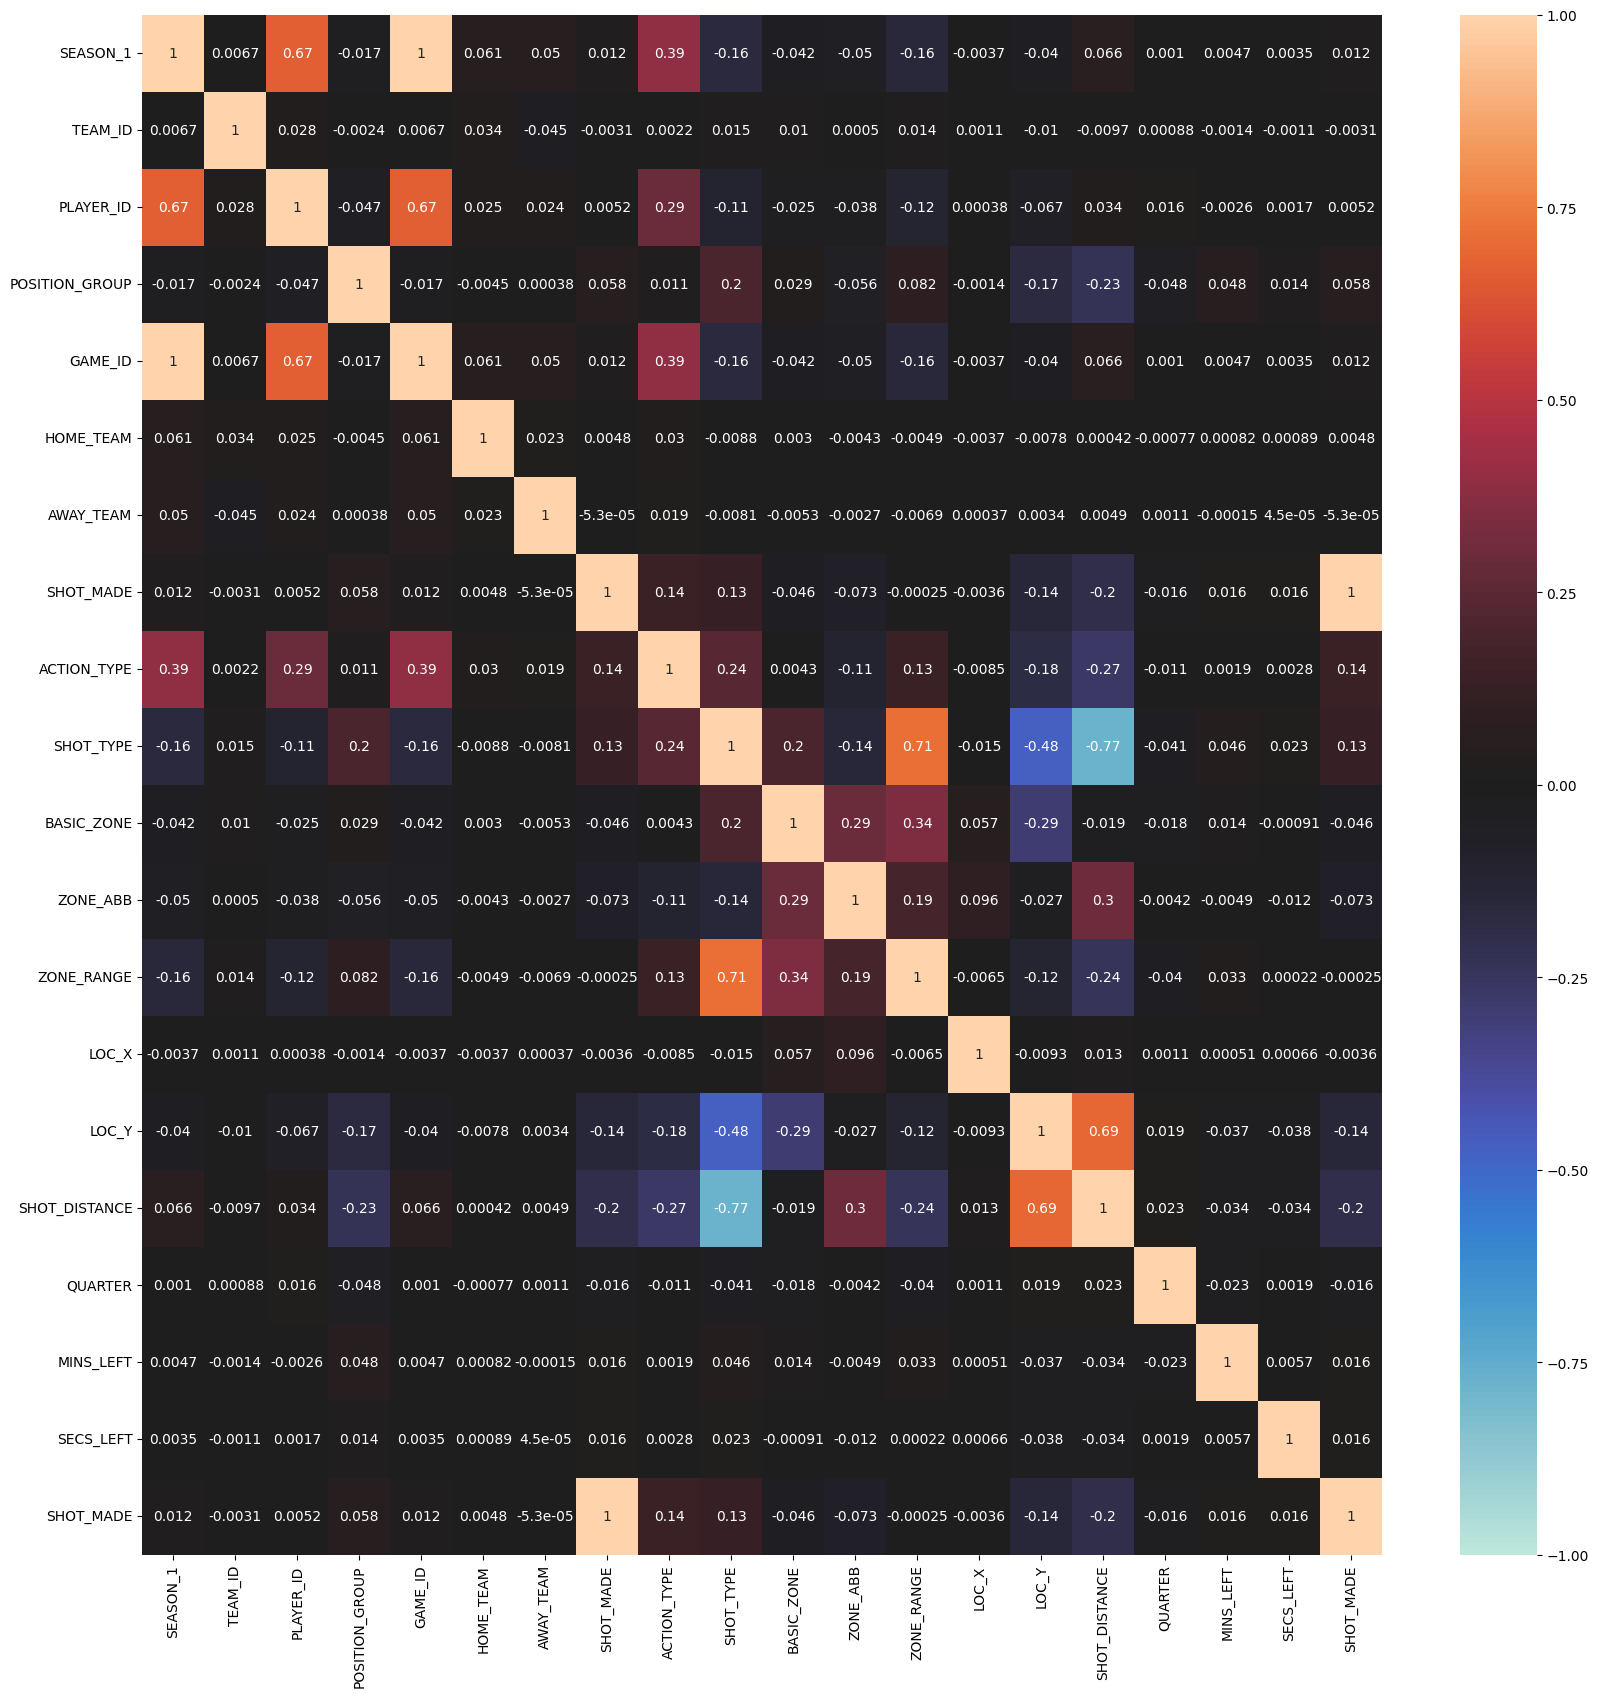

In [57]:
# heatmap w/ preprocessed attributes

# make figure larger
fig, ax = plt.subplots(figsize=(20,20))

attributes = list(Preprocessed_Data.columns)
heat_vars = attributes.copy()
heat_vars.append('SHOT_MADE')
sns.heatmap(Preprocessed_Data[heat_vars].corr(), annot=True,vmin=-1, vmax=1, center= 0, ax=ax)

In [ ]:
# TODO
# Fill in NAN values (making this a seperate ) [DONE]
# Second data exploration round, i.e. heat map [DONE]
# Get rid of attributes that correlate too much
# Scale numerical attributes
# Run first model
# Evaluate model, compare training vs test error
# Answer 4-6 in write up

# Printing

In [61]:
!apt-get update

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,108 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,452 kB]
Get:13 http://archive.ubuntu.com/ubuntu 

In [62]:
!pip install nbconvert
!apt-get install pandoc
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-latex-base texlive-latex-extra texlive

In [63]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/CSE-151A-Project/CSE_151A_Project.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/CSE-151A-Project/CSE_151A_Project.ipynb to pdf
[NbConvertApp] Support files will be in CSE_151A_Project_files/
[NbConvertApp] Making directory ./CSE_151A_Project_files
[NbConvertApp] Writing 93193 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 419496 bytes to /content/drive/MyDrive/CSE-151A-Project/CSE_151A_Project.pdf
